In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
df1 = pd.read_csv("datafile (0).csv") 
df2 = pd.read_csv("datafile (1).csv")
df3 = pd.read_csv("datafile (2).csv")
df4 = pd.read_csv("datafile (3).csv")
df5 = pd.read_csv("datafile (4).csv")


In [3]:
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())
print(df4.isnull().sum())
print(df5.isnull().sum())

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64
Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64
Crop                  0
Production 2006-07    0
Production 2007-08    0
Production 2008-09    0
Production 2009-10    0
Production 2010-11    0
Area 2006-07          0
Area 2007-08          0
Area 2008-09          0
Area 2009-10          0
Area 2010-11          0
Yield 2006-07         0
Yield 2007-08         0
Yield 2008-09         0
Yield 2009-10         0
Yield 2010-11         0
dtype: int64
Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
Unnamed: 4                  78
dtype: int64
Particulars      0
Frequency      

In [4]:
# Handle missing values, if any
df = df1.dropna()  
df = df2.dropna()
df = df3.dropna()
df = df4.dropna()
df = df5.dropna()


In [5]:
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [6]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   139 non-null    object 
 1   2004-05                                12 non-null     float64
 2   2005-06                                12 non-null     float64
 3   2006-07                                12 non-null     float64
 4   2007-08                                12 non-null     float64
 5   2008-09                                12 non-null     float64
 6   2009-10                                12 non-null     float64
 7   2010-11                                12 non-null     float64
 8   2011-12                                12 non-null     float64
 9   State                                  49 non-null     object 
 10  Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 11  Cost o

In [7]:
datasets = [df1, df2, df3, df4, df5]

In [8]:
for i, df in enumerate(datasets, start=1):
    print(f"Dataset {i} Summary:")
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())
    print("\n")

Dataset 1 Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-10  12 non-null     float64
 7   2010-11  12 non-null     float64
 8   2011-12  12 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.0+ KB
None
       2004-05    2005-06     2006-07     2007-08     2008-09     2009-10  \
count     12.0   12.00000   12.000000   12.000000   12.000000   12.000000   
mean     100.0   99.75000  102.000000  104.750000  106.416667  114.916667   
std        0.0    6.64865   12.634728   10.963783   11.261022   15.900019   
min      100.0   86.00000   85.000000   87.000000   80.000000   81.000000   
25%      100.0   96

        3-1993   3-1994   3-1995     3-1996        3-1997        3-1998  \
count      3.0      4.0      4.0   6.000000     10.000000     10.000000   
mean       0.0      0.0      0.0   6.753000   1310.623000   1276.252000   
std        0.0      0.0      0.0  16.337482   4128.680346   4019.889103   
min        0.0      0.0      0.0   0.000000      0.000000      0.000000   
25%        0.0      0.0      0.0   0.000000      0.000000      0.000000   
50%        0.0      0.0      0.0   0.000000      0.215000      0.230000   
75%        0.0      0.0      0.0   0.313500      3.290000      2.875000   
max        0.0      0.0      0.0  40.100000  13061.000000  12717.000000   

             3-1999        3-2000        3-2001        3-2002  ...  \
count     11.000000     20.000000     22.000000     36.000000  ...   
mean    1146.230909    621.747000    588.115000    425.641667  ...   
std     3777.583647   2708.616162   2682.320751   2152.677440  ...   
min        0.000000      0.000000      0.000

In [9]:
for i, df in enumerate(datasets, start=1):
    print(f"Cleaning Dataset {i}")
    df.dropna(inplace=True)

Cleaning Dataset 1
Cleaning Dataset 2
Cleaning Dataset 3
Cleaning Dataset 4
Cleaning Dataset 5


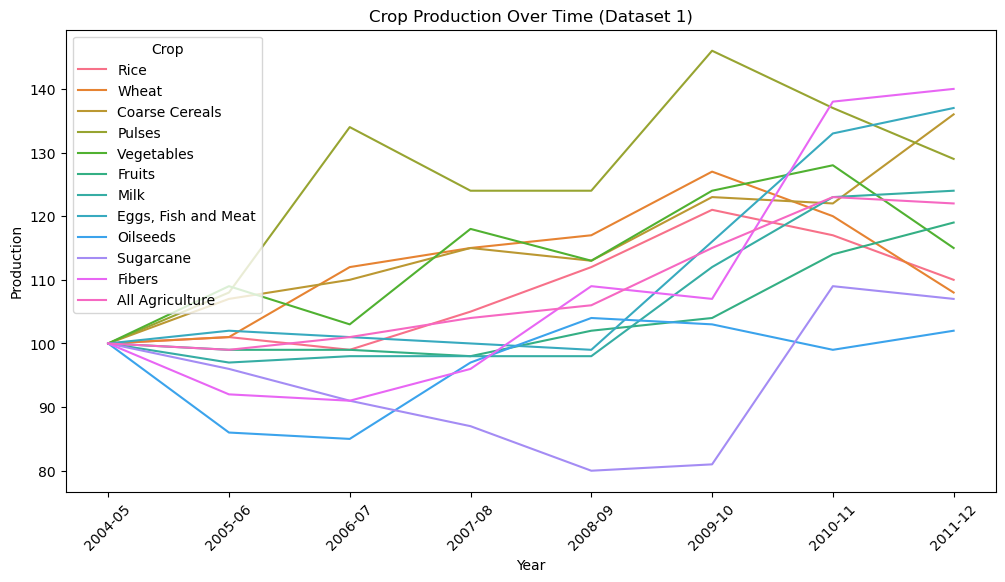

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert wide format to long format
df1_melted = df1.melt(id_vars=['Crop'], var_name='Year', value_name='Production')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Production', hue='Crop', data=df1_melted)
plt.title('Crop Production Over Time (Dataset 1)')
plt.xticks(rotation=45)
plt.show()


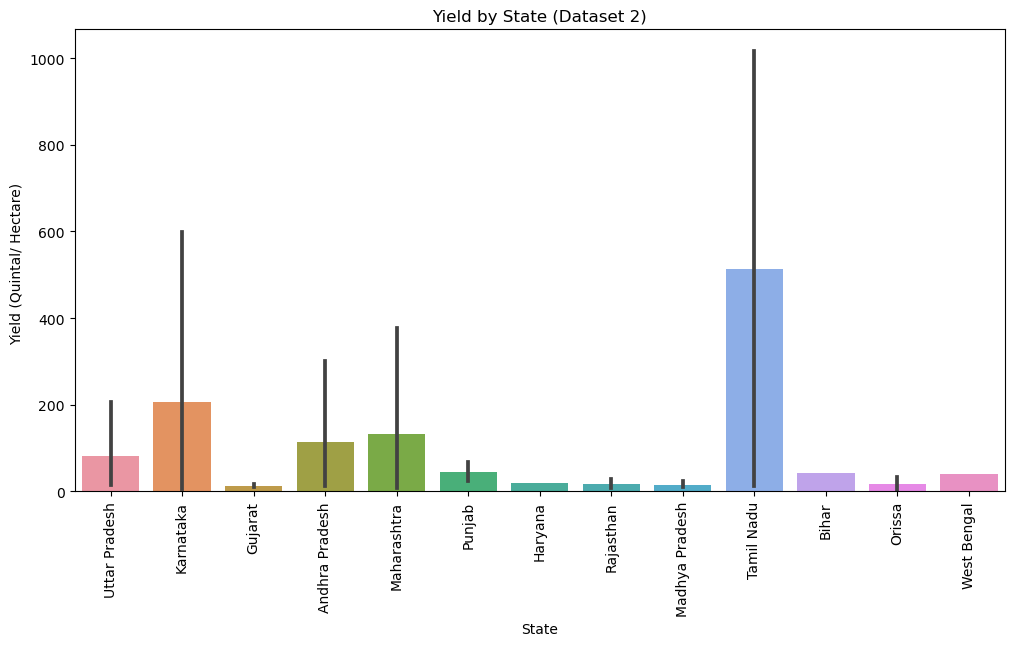

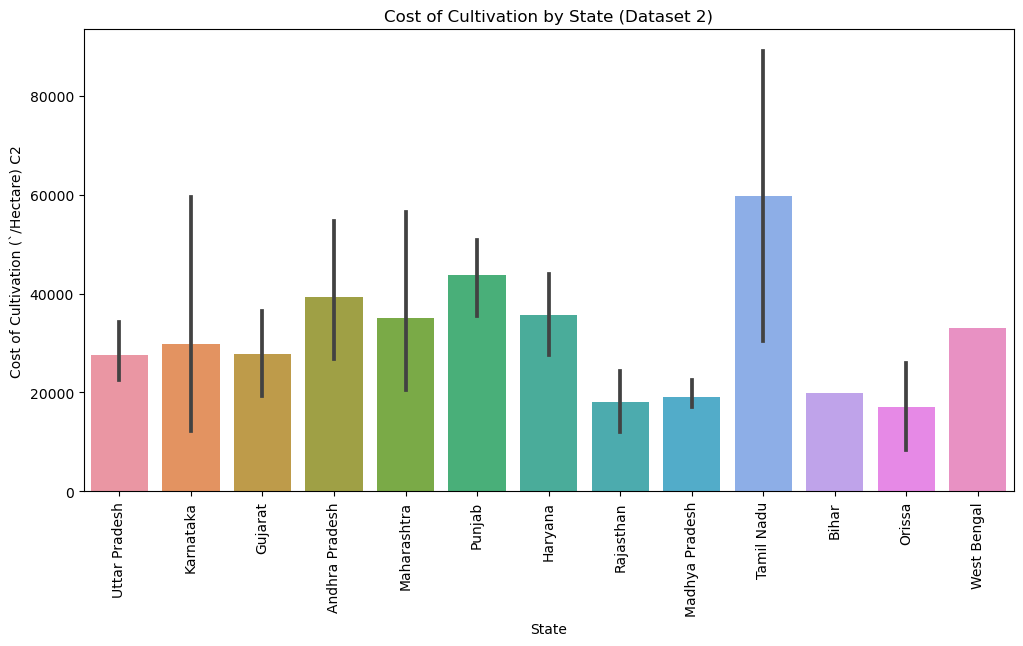

In [11]:
# Plotting Yield by State
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Yield (Quintal/ Hectare) ', data=df2)
plt.xticks(rotation=90)
plt.title('Yield by State (Dataset 2)')
plt.show()

# Plotting Cost of Cultivation by State
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Cost of Cultivation (`/Hectare) C2', data=df2)
plt.xticks(rotation=90)
plt.title('Cost of Cultivation by State (Dataset 2)')
plt.show()



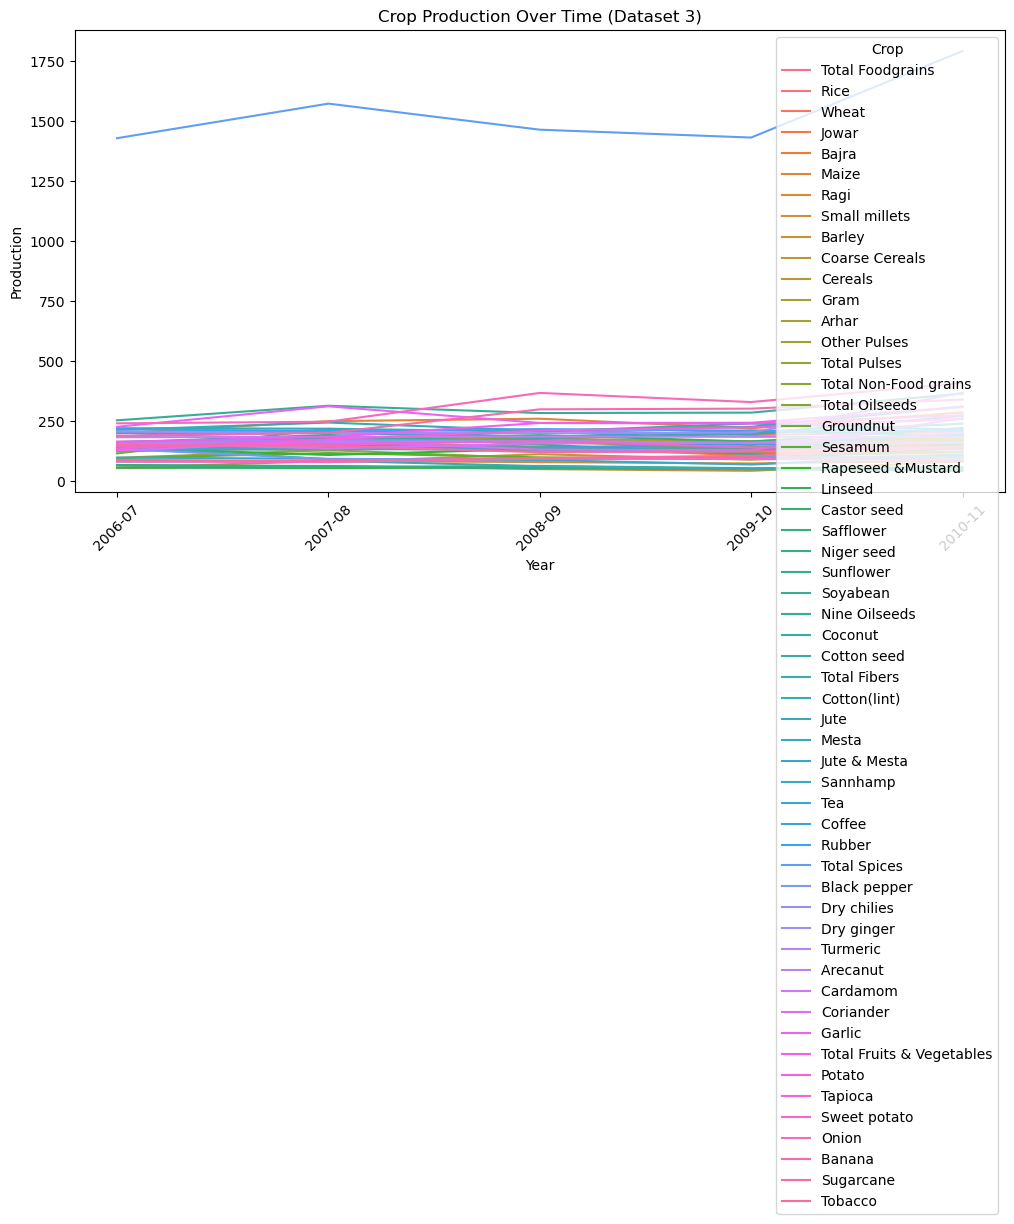

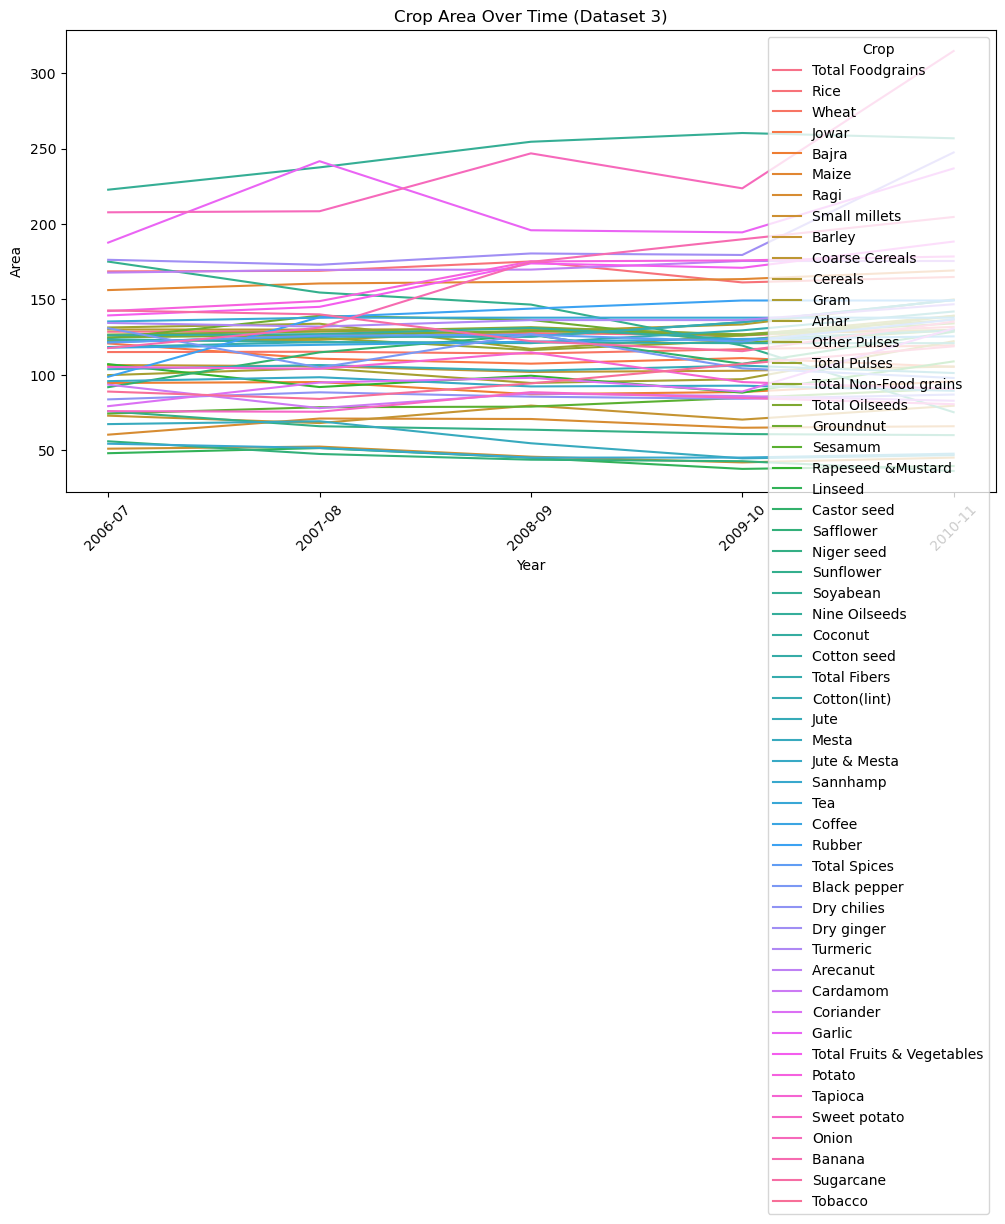

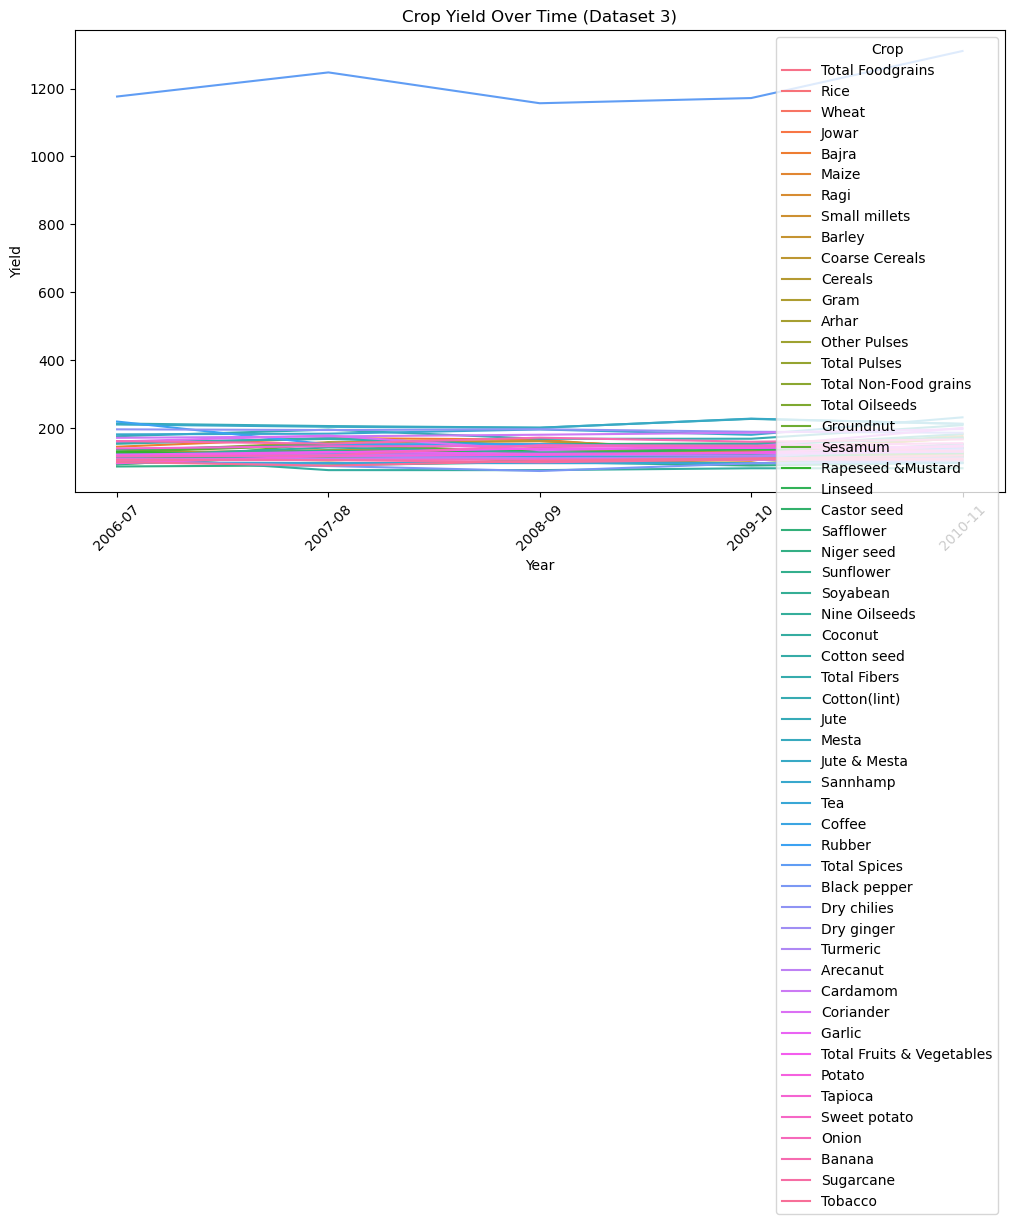

In [12]:
# Remove extra spaces in column names
df3.columns = df3.columns.str.strip()

# Convert wide format to long format for Production, Area, and Yield
df3_melted_prod = df3.melt(id_vars=['Crop'], value_vars=['Production 2006-07', 'Production 2007-08', 'Production 2008-09', 'Production 2009-10', 'Production 2010-11'], var_name='Year', value_name='Production')
df3_melted_area = df3.melt(id_vars=['Crop'], value_vars=['Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10', 'Area 2010-11'], var_name='Year', value_name='Area')
df3_melted_yield = df3.melt(id_vars=['Crop'], value_vars=['Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09', 'Yield 2009-10', 'Yield 2010-11'], var_name='Year', value_name='Yield')

# Clean Year column
df3_melted_prod['Year'] = df3_melted_prod['Year'].str.replace('Production ', '')
df3_melted_area['Year'] = df3_melted_area['Year'].str.replace('Area ', '')
df3_melted_yield['Year'] = df3_melted_yield['Year'].str.replace('Yield ', '')

# Plotting Production
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Production', hue='Crop', data=df3_melted_prod)
plt.title('Crop Production Over Time (Dataset 3)')
plt.xticks(rotation=45)
plt.show()

# Plotting Area
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Area', hue='Crop', data=df3_melted_area)
plt.title('Crop Area Over Time (Dataset 3)')
plt.xticks(rotation=45)
plt.show()

# Plotting Yield
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Yield', hue='Crop', data=df3_melted_yield)
plt.title('Crop Yield Over Time (Dataset 3)')
plt.xticks(rotation=45)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data from Dataset 3 for prediction
# Assuming we're predicting production based on area and yield

# Selecting relevant columns
df3_clean = df3[['Production 2010-11', 'Area 2010-11', 'Yield 2010-11']].dropna()

# Splitting into features (X) and target (y)
X = df3_clean[['Area 2010-11', 'Yield 2010-11']]
y = df3_clean['Production 2010-11']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


Mean Squared Error: 191.48130294562782
R-squared: 0.9765806019543105


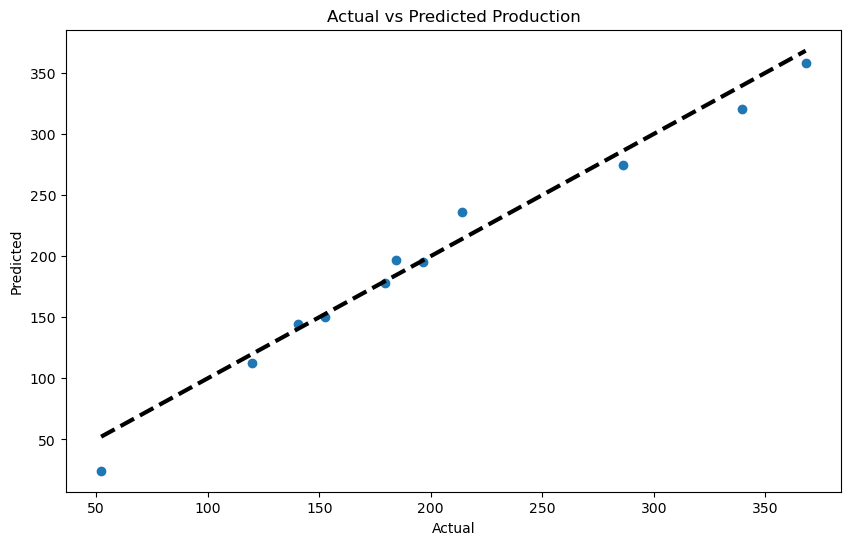

In [15]:
# Calculate the MSE and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Production')
plt.show()


In [16]:
# Example new data (replace with actual new data for predictions)
new_data = pd.DataFrame({
    'Area 2010-11': [3000, 4500, 6000],  # Replace with actual new data
    'Yield 2010-11': [20, 25, 30]
})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Make predictions
new_predictions = model.predict(new_data_scaled)

print('Predicted Productions:', new_predictions)


Predicted Productions: [4070.50935819 6195.57665842 8320.64395866]


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


Random Forest Mean Squared Error: 670.0860320000015
Random Forest R-squared: 0.9180441574876854


In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best R-squared score: {grid_search.best_score_}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best R-squared score: 0.5425073597724234


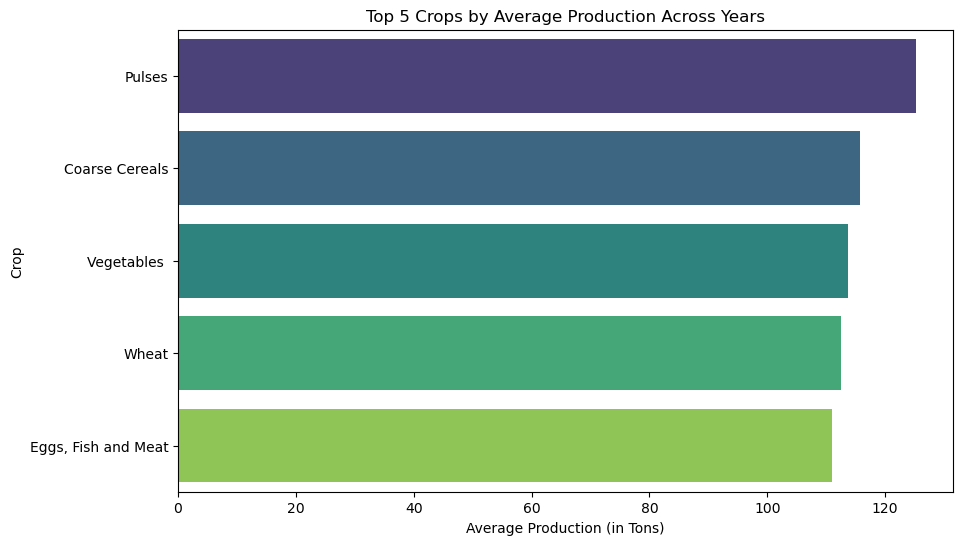

In [19]:
# Group by 'Crop' and calculate the mean production across all years
top_crops = df1_melted.groupby('Crop')['Production'].mean().nlargest(5)

# Plotting the top 5 crops by average production
plt.figure(figsize=(10,6))
sns.barplot(x=top_crops.values, y=top_crops.index, palette='viridis')
plt.title('Top 5 Crops by Average Production Across Years')
plt.xlabel('Average Production (in Tons)')
plt.ylabel('Crop')
plt.show()


In [20]:
import pandas as pd

# Assuming df1_melted has already been created and contains 'Crop', 'Year', and 'Production'

# Group by 'Crop' and calculate the mean production across all years to get the top 5 crops
top_5_crops = df1_melted.groupby('Crop')['Production'].mean().nlargest(5).index

# Filter the dataset for only the top 5 crops
df_top_crops = df1_melted[df1_melted['Crop'].isin(top_5_crops)]

# Create a pivot table with crops as rows and years as columns
pivot_table_production = df_top_crops.pivot_table(index='Crop', columns='Year', values='Production', aggfunc='sum')

# Display the pivot table
pivot_table_production


Year,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
Crop,,,,,,,,
Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
